In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# import torch
# from omegaconf import OmegaConf

In [6]:
model475 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250725_015032-q9cfxrvb/files/JetData.npz")
model468 = np.load("/home/jtoledo/CaloQuVAE/outputs_sym/run-20250723_201652-993qhoh4/files/JetData.npz")
model454 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250721_152921-c22o2vxp/files/JetData.npz")
model453 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250720_233628-4hns88vo/files/JetData.npz")
model448 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250718_004118-9vdkr3bn/files/JetData.npz")
model400 = np.load("/fast_scratch_1/caloqvae/jtoledo/wandb/run-20250712_153312-7p5kb9zm/files/JetData.npz")
modelBest = np.load("/home/jtoledo/JetData.npz")

models = {'model448': model448, 'model400': model400, 'modelBest': modelBest, 
    'model453': model453, 'model454': model454, 'model475': model475, 'model468': model468}
models = { 'modelBest': modelBest, 'model453': model453, 'model454': model454, 
          'model475': model475, 'model468': model468}

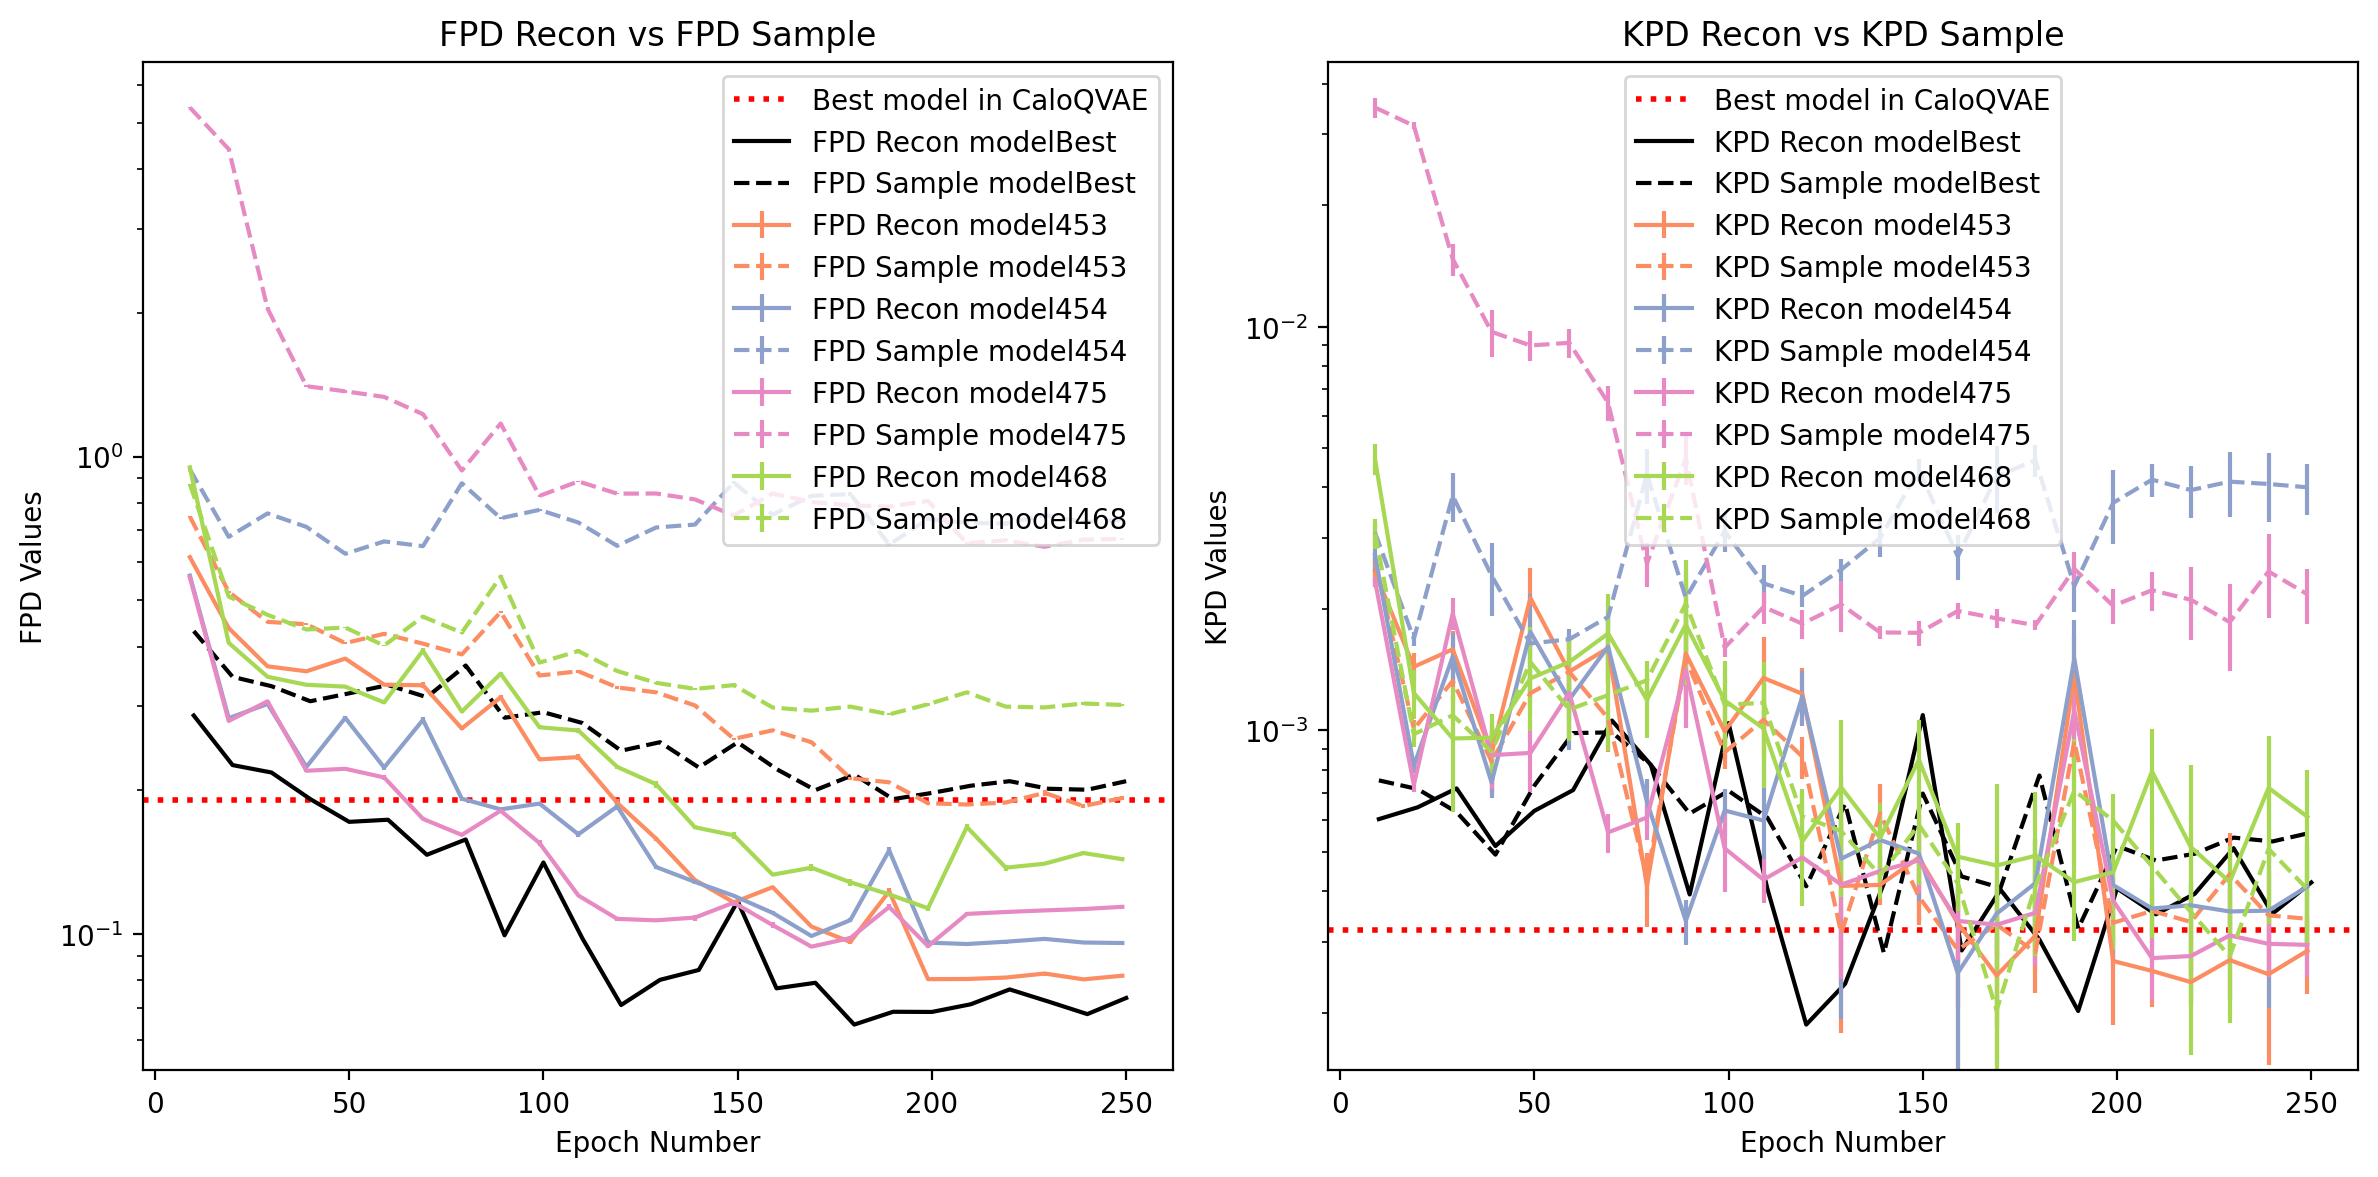

In [7]:
# Define a color cycle for models
palette = plt.get_cmap('Set2')
model_names = list(models.keys())
model_colors = {name: palette(i) for i, name in enumerate(model_names)}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.axhline(0.191, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
ax2.axhline(0.00032, color='red', linestyle=':', linewidth=2, label='Best model in CaloQVAE')
for name, model in models.items():
    color = model_colors[name]
    if name != 'modelBest':
        en_list = model['array1']
        fpd_recon = model['array2']
        fpd_recon_err = model['array3']
        kpd_recon = model['array4']
        kpd_recon_err = model['array5']
        fpd_sample = model['array6']
        fpd_sample_err = model['array7']
        kpd_sample = model['array8']
        kpd_sample_err = model['array9']
        # Plot fpd_recon and fpd_sample on ax1
        ax1.errorbar(en_list, fpd_recon, yerr=fpd_recon_err, label=f'FPD Recon {name}', color=color)
        ax1.errorbar(en_list, fpd_sample, yerr=fpd_sample_err, label=f'FPD Sample {name}', linestyle='--', color=color)
        ax1.set_xlabel('Epoch Number')
        ax1.set_ylabel('FPD Values')
        ax1.set_title('FPD Recon vs FPD Sample')
        ax1.set_yscale('log')

        # Plot kpd_recon and kpd_sample on ax2
        ax2.errorbar(en_list, kpd_recon, yerr=kpd_recon_err, label=f'KPD Recon {name}', color=color)
        ax2.errorbar(en_list, kpd_sample, yerr=kpd_sample_err, label=f'KPD Sample {name}', linestyle='--', color=color)
        ax2.set_xlabel('Epoch Number')
        ax2.set_ylabel('KPD Values')
        ax2.set_title('KPD Recon vs KPD Sample')
        
    else:
        en_list = model['array1']
        fpd_recon = model['array2']
        # fpd_recon_err = model['array3']
        kpd_recon = model['array3']
        # kpd_recon_err = model['array5']
        fpd_sample = model['array4']
        # fpd_sample_err = model['array7']
        kpd_sample = model['array5']
        # kpd_sample_err = model['array9']
        ax1.plot(en_list, fpd_recon, label=f'FPD Recon {name}', color='black')
        ax1.plot(en_list, fpd_sample, label=f'FPD Sample {name}', linestyle='--', color='black')
        ax2.plot(en_list, kpd_recon, label=f'KPD Recon {name}', color='black')
        ax2.plot(en_list, kpd_sample, label=f'KPD Sample {name}', linestyle='--', color='black')

    ax1.legend()
    ax2.legend()
    ax1.set_yscale('log')
    ax2.set_yscale('log')

    

plt.tight_layout()